# 18장 이진 검색

> 이진 검색이란 정렬된 배열에서 타겟을 찾는 검색 알고리즘이라고 합니다.

이진 검색은 값을 찾아내는 시간 복잡도가 O(logn) 이라는 점에서 대표적인 로그 시간 알고리즘이며, 이진 탐색 트리 (BST)와도 유사한 점이 많습니다.

하지만, 이진 탐색 트리가 정렬된 구조를 저장하고 탐색하는 '자료구조'라면, 이진 검색은 정렬된 배열에서 값을 찾아내는 '알고리즘' 자체를 지칭합니다.

이진 검색의 장점! log2(77) = 6.xx 로 해결 할 수 있습니다.

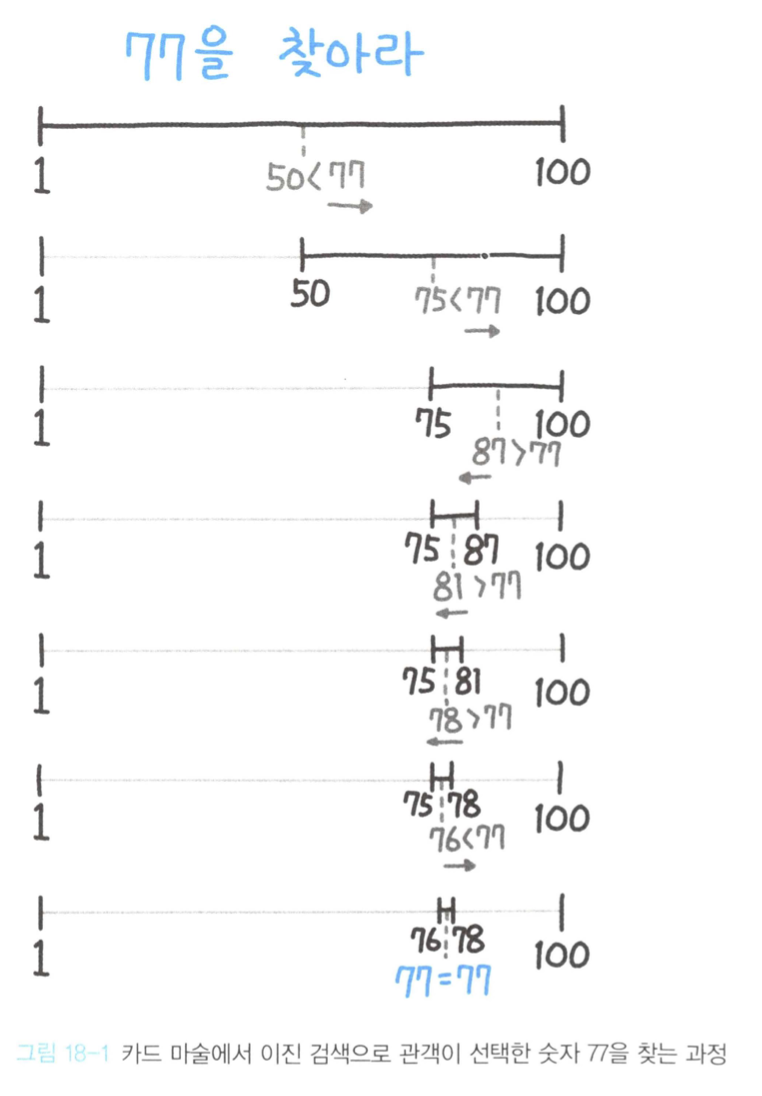

### 65. 이진 검색

정렬된 nums를 입력 받아 이진 검색으로 target에 해당하는 인덱스를 찾아라.

- input : nums = [-1, 0, 3, 5, 9, 12], target = 9
- output : 4

### 풀이 1. 재귀 풀이

먼저, 간단히 재귀로 이진 검색을 구현할 수 있습니다. 절반씩 범위를 줄여나가며 맞출 때까지 계속 재귀 호출하면 됩니다. 앞서 카드 마술 설명과 동일한 정석대로의 풀이로, 전체 코드는 다음과 같습니다.

In [ ]:
def search1(self, nums, target):
  def binary_search(left, right):
    if left <= right:
      # 자료형을 초과하지 않는 중앙 위치 계산
      mid = (left + right) // 2

      if nums[mid] < target:
        return binary_search(mid + 1, right)
      elif nums[mid] > target:
        return binary_search(left, mid - 1)
      else:
        return mid
    else:
      return -1

  return binary_search(0, len(nums) -1)

In [ ]:
nums = [-1, 0, 3, 5, 9, 12]
target = 9

In [ ]:
search1(None, nums, target)

4

### 풀이 2. 반복 풀이

이제 이 문제를 반복 풀이로 바꿔보았습니다. 대부분의 재귀 풀이는 반복 풀이로 변경할 수 있습니다.

대개는 재귀 풀이가 더 우아한 편이지만, 반복 풀이는 좀 더 직관적이라 이해가 쉽다는 장점이 있습니다.

In [ ]:
def search2(self, nums, target):
  left, right = 0, len(nums) - 1
  while left <= right:
    mid = (left + right) // 2

    if nums[mid] < target:
      left = mid + 1
    elif nums[mid] > target:
      right = mid - 1
    else:
      return mid
      
  return -1

In [ ]:
search2(None, nums, target)

4

### 풀이 3. 이진 검색 모듈

이진 검색 알고리즘을 지원하는 bisect 모듈을 기본으로 제공하기 때문에 여러 가지 예외 처리를 포함한 이진 검색 알고리즘이 깔끔하게 모듈 형태로 구현되어 있으므로, 이 모듈을 이용하면 이진 검색을 파이썬 다운 방식으로 다음과 같이 좀 더 간단히 풀이 할 수 있습니다.

In [ ]:
import bisect

def search3(self, nums, target):
  index = bisect.bisect_left(nums, target)

  if index < len(nums) and nums[index] == target:
    return index

  else:
    return -1

In [ ]:
search3(None, nums, target)

4

### 풀이 4. 이진 검색을 사용하지 않는 index 풀이

앞에서의 풀이까지는 이진 검색을 사용하여 풀었지만, 이번에는 이진 검색을 사용하지 않고 한 번 시도해 보도록 하겠습니다. 파이썬에서 제공하는 해당 값의 인덱스를 찾아내는 Index() 메소드를 활용하는 방법입니다. 이 경우 존재하지 않는 값이라면 에러가 발생하므로, 에러인 ValueError를 예외 처리 하여 -1을 리텅하도록 처리하면 풀이가 가능합니다.

In [ ]:
def search4(self, nums, target):
  try:
    return nums.index(target)
  except ValueError:
    return -1

In [ ]:
search4(None, nums, target)

4

### 66. 회전 정렬된 배열 검색

특정 피벗을 기준으로 회전하여 정렬된 배열에서 target 값의 인덱스를 출력하라.

- 입력 : nums = [4, 5, 6, 7, 0, 1, 2], target = 1

- 출력 : 5

- 설명 : 정렬된 입력값은 [0, 1, 2, 4, 5, 6, 7] 이며 이진 검색을 통해 1의 위치를 찾은 다음 (위치 1) 원래의 입력값에서 얼마만큼 돌아가 있는지를 확인하여 (4칸), '위치 1 + 4칸 = 인덱스 5'를 리턴합니다.

### 풀이 1. 피벗을 기준으로 한 이진 검색

In [ ]:
def pivot_search(self, nums, target):
    # 예외 처리
    if not nums:
        return -1

    # 최소값 찾아 피벗 설정
    left, right = 0, len(nums) - 1
    while left < right:
        mid = left + (right - left) // 2

        if nums[mid] > nums[right]:
            left = mid + 1
        else:
            right = mid

    pivot = left

    # 피벗 기준 이진 검색
    left, right = 0, len(nums) - 1
    while left <= right:
        mid = left + (right - left) // 2
        mid_pivot = (mid + pivot) % len(nums)

        if nums[mid_pivot] < target:
            left = mid + 1
        elif nums[mid_pivot] > target:
            right = mid - 1
        else:
            return mid_pivot
    return -1

In [ ]:
nums = [4, 5, 6, 7, 0, 1, 2]
target = 1

In [ ]:
pivot_search(None, nums, target)

5

### 67. 두 배열의 교집합

두 배열의 교집합을 구하라.

예제 1

- input : nums1 = [1, 2, 2, 1], nums2 = [2, 2]

- output : [2]

예제 2

- input : num1 = [4, 9, 5], nums2 = [9, 4, 9, 8, 4]

- output : [9, 4]

### 풀이 1. 브루트 포스로 계산

이진 검색과 투 포인트 등 다양한 풀이법을 시도 할 수 있습니다. 먼저 가장 간단하고 직관적인 브루트 포스 부터 풀이해보겠습니다.

In [ ]:
from typing import List, Set

def intersection1(self, nums1: List[int], nums2: List[int]) -> List[int]:
    result: Set = set()
    for n1 in nums1:
        for n2 in nums2:
            if n1 == n2:
                result.add(n1)

    return result

In [ ]:
nums1 = [1, 2, 2, 1]
nums2 = [2, 2]

In [ ]:
intersection1(None, nums1, nums2)

{2}

### 풀이 2. 이진 검색으로 일치 여부 판별

In [ ]:
import bisect

def intersection2(self, nums1: List[int], nums2: List[int]) -> List[int]:
    result: Set = set()
    nums2.sort()
    for n1 in nums1:
        # 이진 검색으로 일치 여부 판별
        i2 = bisect.bisect_left(nums2, n1)
        if len(nums2) > 0 and len(nums2) > i2 and n1 == nums2[i2]:
            result.add(n1)

    return result

In [ ]:
intersection2(None, nums1, nums2)

{2}

### 풀이 3. 투 포인터로 일치 여부 판별

In [ ]:
def intersection3(self, nums1: List[int], nums2: List[int]) -> List[int]:
    result: Set = set()
    # 양쪽 모두 정렬
    nums1.sort()
    nums2.sort()
    i = j = 0
    # 투 포인터 우측으로 이동하며 일치 여부 판별
    while i < len(nums1) and j < len(nums2):
        if nums1[i] > nums2[j]:
            j += 1
        elif nums1[i] < nums2[j]:
            i += 1
        else:
            result.add(nums1[i])
            i += 1
            j += 1

    return result

In [ ]:
intersection3(None, nums1, nums2)

{2}

### 두 수의 합 2

정렬된 배열을 받아 덧셈하여 타겟을 만들 수 있는 배열의 두 숫자 인덱스를 리턴하라. 

주의) 이 문제에서 배열은 0이 Zero-Based 아닌 1부터 시작하는 것으로 한다

- 입력 : numbers = [2,7,11,15], target = 9

- 출력 : [1,2]


### 풀이 1. 투 포인터

In [ ]:
def twoSum1(self, numbers: List[int], target: int) -> List[int]:
    left, right = 0, len(numbers) - 1
    while not left == right:
        if numbers[left] + numbers[right] < target:
            left += 1
        elif numbers[left] + numbers[right] > target:
            right -= 1
        else:
            return left + 1, right + 1  # 리턴 값 +1

In [ ]:
numbers = [2, 7, 11, 15]
target = 9

In [ ]:
twoSum1(None, numbers, target)

(1, 2)

### 풀이 2. 이진 검색

In [ ]:
def twoSum2(self, numbers: List[int], target: int) -> List[int]:
    for k, v in enumerate(numbers):
        left, right = k + 1, len(numbers) - 1
        expected = target - v
        # 이진 검색으로 나머지 값 판별
        while left <= right:
            mid = left + (right - left) // 2
            if numbers[mid] < expected:
                left = mid + 1
            elif numbers[mid] > expected:
                right = mid - 1
            else:
                return k + 1, mid + 1

In [ ]:
twoSum2(None, numbers, target)

(1, 2)

### 풀이 3. bisect 모듈 + 슬라이싱

In [ ]:
def twoSum3(self, numbers: List[int], target: int) -> List[int]:
    for k, v in enumerate(numbers):
        expected = target - v
        i = bisect.bisect_left(numbers[k + 1:], expected)
        if i < len(numbers[k + 1:]) and numbers[i + k + 1] == expected:
            return k + 1, i + k + 2

In [ ]:
twoSum3(None, numbers, target)

(1, 2)

### 풀이 4. bisect 모듈 + 슬라이싱 최소화

In [ ]:
def twoSum4(self, numbers: List[int], target: int) -> List[int]:
    for k, v in enumerate(numbers):
        expected = target - v
        nums = numbers[k + 1:]
        i = bisect.bisect_left(nums, expected)
        if i < len(nums) and numbers[i + k + 1] == expected:
            return k + 1, i + k + 2

In [ ]:
twoSum4(None, numbers, target)

(1, 2)

In [ ]:
### 풀이 5. bisect 모듈 + 슬라이싱 제거

def twoSum5(self, numbers: List[int], target: int) -> List[int]:
    for k, v in enumerate(numbers):
        expected = target - v
        i = bisect.bisect_left(numbers, expected, k + 1)
        if i < len(numbers) and numbers[i] == expected:
            return k + 1, i + 1

In [ ]:
twoSum5(None, numbers, target)

(1, 2)

### 69. 2D 행렬 검색 2

m x n 행렬에서 값을 찾아내는 효율적인 알고리즘을 구현하라. 행렬은 왼쪽에서 오른쪽, 위에서 아래 오름차순으로 정렬 되어 있습니다.

- 예제

[  
  [1, 4, 7, 11, 15],  
  [2, 5, 8, 12, 19],  
  [3, 6, 9, 16, 22],  
  [10, 13, 14, 17, 24],  
  [18, 21, 23, 26, 30]  
] 

target = 5 일 경우, 값이 존재하므로 true를 리턴합니다.

target = 20 일 경우, 값이 존재하지 않으므로 false를 리턴합니다.

### 풀이 1. 첫 행의 맨 뒤에서 탐색

In [ ]:
def searchMatrix1(self, matrix, target):
    # 예외 처리
    if not matrix:
        return False

    # 첫 행의 맨 뒤
    row = 0
    col = len(matrix[0]) - 1

    while row <= len(matrix) - 1 and col >= 0:
        if target == matrix[row][col]:
            return True
        # 타겟이 작으면 왼쪽으로
        elif target < matrix[row][col]:
            col -= 1
        # 타겟이 크면 아래로
        elif target > matrix[row][col]:
            row += 1
    return False

In [ ]:
matrix = [  
  [1, 4, 7, 11, 15],  
  [2, 5, 8, 12, 19],  
  [3, 6, 9, 16, 22],  
  [10, 13, 14, 17, 24],  
  [18, 21, 23, 26, 30]  
] 

target1 = 5
target2 = 20

In [ ]:
searchMatrix1(None, matrix, target1)

True

In [ ]:
searchMatrix1(None, matrix, target2)

False

### 풀이 2. 파이썬다운 방식

In [ ]:
def searchMatrix2(self, matrix, target):
    return any(target in row for row in matrix)

In [ ]:
searchMatrix2(None, matrix, target1)

True

In [ ]:
searchMatrix2(None, matrix, target2)

False

### any() 와 all() 함수

In [ ]:
any([True, False, False])

True

any() 는 포함된 값 중에 어느 하나가 참이라면 항상 참으로 출력합니다. 논리 연산의 OR과 비슷합니다.

In [ ]:
True or False or False

True

반면 all() 이라는 함수도 있습니다. 이 함수는 모든 값이 참이어야 True를 출력합니다.

In [ ]:
all([True, False, False])

False

In [ ]:
all([True, True, True])

True

이처럼 all()은 논리 연산의 AND 와 유사합니다.

In [ ]:
True and True and True

True